In [5]:
%config Completer.use_jedi = False

# Random Forest

- 여러 개의 Decision Tree를 무작위로 학습시켜 결과를 투표(분류) 또는 **평균(회귀)**으로 결정하는 앙상블 모델입니다.
1. 과적합 방지에 강함
2. 피처 중요도 해석 가능
3. 비교적 빠르고 튜닝이 쉬움

데이터 셋

In [8]:
import numpy as np  # numpy: 숫자 계산을 쉽게 해주는 도구
from sklearn.model_selection import train_test_split  # train_test_split: 데이터를 나누는 함수
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier: 랜덤 포레스트라는 똑똑한 기계(모델)를 만들어주는 도구
from sklearn.svm import SVC  # SVC: 서포트 벡터 머신이라는 또 다른 똑똑한 기계(모델)를 만들어주는 도구(여기선 사용하지 않음)
from sklearn.metrics import classification_report, confusion_matrix  # 모델이 얼마나 잘 맞췄는지 알려주는 도구들

# 예시 데이터 만들기: 1000개의 샘플(행), 10개의 특징(열)
# X: 공정(작업 과정)과 관련된 숫자 정보들이 들어있는 표
# y: 각 샘플이 정상(0)인지 불량(1)인지 알려주는 정답
X = np.random.rand(1000, 10)  # np.random.rand(1000, 10): 0~1 사이의 랜덤 숫자로 1000행 10열짜리 표를 만듦
# X의 매개변수: 1000(행 개수), 10(열 개수)
y = np.random.randint(0, 2, 1000)  # np.random.randint(0, 2, 1000): 0 또는 1을 1000개 뽑아서 정답(y)로 사용
# np.random.randint의 매개변수: 0(최소값), 2(최대값, 2는 포함X), 1000(몇 개 만들지)

# 데이터를 두 부분으로 나누기: 학습용(80%), 테스트용(20%)
# X_train: 학습에 쓸 특징 데이터
# X_test: 테스트에 쓸 특징 데이터
# y_train: 학습에 쓸 정답
# y_test: 테스트에 쓸 정답
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# train_test_split의 매개변수:
#   X, y: 나눌 데이터
#   test_size=0.2: 테스트용으로 20%를 사용
#   random_state=42: 랜덤하게 나누지만, 42로 정해두면 매번 똑같이 나눔

# 1. 랜덤 포레스트 모델 만들기
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# RandomForestClassifier의 매개변수:
#   n_estimators=100: 나무(결정트리)를 100개 만듦
#   max_depth=None: 나무의 최대 깊이를 제한하지 않음
#   random_state=42: 랜덤하게 만들지만, 42로 정해두면 매번 똑같이 만듦

# 2. 모델을 학습시키기(공부시키기)
rf_model.fit(X_train, y_train)  # fit: X_train(특징), y_train(정답)으로 모델이 공부함

# 3. 테스트 데이터로 예측하기(정답 맞히기)
y_pred_rf = rf_model.predict(X_test)  # predict: X_test(특징)로 정답이 뭔지 예측함

# 4. 결과 평가하기(얼마나 잘 맞췄는지 확인)
print("✅ Random Forest 결과:")
print(classification_report(y_test, y_pred_rf))  # classification_report: 정답과 예측을 비교해서 자세히 알려줌
print(confusion_matrix(y_test, y_pred_rf))  # confusion_matrix: 정답과 예측이 얼마나 맞았는지 표로 보여줌


✅ Random Forest 결과:
              precision    recall  f1-score   support

           0       0.43      0.46      0.45        89
           1       0.54      0.51      0.53       111

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

[[41 48]
 [54 57]]


In [9]:
# 1. 모델 정의
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
# RandomForestClassifier의 매개변수:
#   n_estimators=100: 나무(결정트리)를 100개 만듦
#   max_depth=None: 나무의 최대 깊이를 제한하지 않음
#   random_state=42: 랜덤하게 만들지만, 42로 정해두면 매번 똑같이 만듦

# 2. 학습
rf_model.fit(X_train, y_train)  # fit: X_train(특징), y_train(정답)으로 모델이 공부함

# 3. 예측
y_pred_rf = rf_model.predict(X_test)  # predict: X_test(특징)로 정답이 뭔지 예측함

# 4. 평가
print("✅ Random Forest 결과:")
print(classification_report(y_test, y_pred_rf))  # classification_report: 정답과 예측을 비교해서 자세히 알려줌
print(confusion_matrix(y_test, y_pred_rf))  # confusion_matrix: 정답과 예측이 얼마나 맞았는지 표로 보여줌

✅ Random Forest 결과:
              precision    recall  f1-score   support

           0       0.43      0.46      0.45        89
           1       0.54      0.51      0.53       111

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200

[[41 48]
 [54 57]]


| 함수 / 매개변수                  | 설명                             |
| -------------------------- | ------------------------------ |
| `RandomForestClassifier()` | 랜덤 포레스트 모델 생성                  |
| `n_estimators=100`         | 생성할 트리 수 (많을수록 성능 ↑, 속도 ↓)     |
| `max_depth=None`           | 트리의 최대 깊이 (None이면 자동 완성)       |
| `random_state=42`          | 결과 재현성을 위한 랜덤 시드 고정            |
| `fit(X, y)`                | 데이터를 기반으로 모델 학습                |
| `predict(X)`               | 예측 수행                          |
| `classification_report()`  | precision, recall, f1-score 출력 |
| `confusion_matrix()`       | 정답 vs 예측 비교 행렬                 |


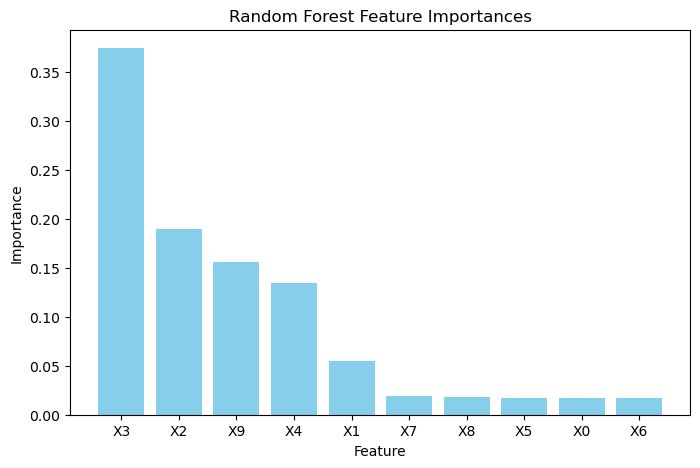

In [10]:
# 예시 데이터 생성: 10개 피처(특징) 중 3개가 유의미(정답에 영향을 줌)
X, y = make_classification(n_samples=500, n_features=10,
                           n_informative=3, n_redundant=2,
                           random_state=42)
# make_classification의 매개변수:
#   n_samples=500: 샘플(행) 500개 만듦
#   n_features=10: 특징(열) 10개 만듦
#   n_informative=3: 이 중 3개는 정답에 진짜로 영향을 줌
#   n_redundant=2: 2개는 다른 특징을 섞어서 만듦(중복 느낌)
#   random_state=42: 랜덤하게 만들지만, 42로 정해두면 매번 똑같이 만듦
# X: 특징 데이터, y: 정답(0 또는 1)

rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 랜덤 포레스트 모델 만들기
# n_estimators=100: 나무(결정트리) 100개 사용
# random_state=42: 랜덤하게 만들지만, 42로 정해두면 매번 똑같이 만듦
rf.fit(X, y)  # fit: X(특징), y(정답)으로 모델이 공부함

# 피처 중요도 추출(각 특징이 정답에 얼마나 중요한지 알려줌)
importances = rf.feature_importances_  # feature_importances_: 각 특징의 중요도를 숫자로 알려줌
indices = np.argsort(importances)[::-1]  # 중요도가 큰 순서대로 번호를 정렬함

# 시각화(그래프로 보기 좋게 그림)
plt.figure(figsize=(8,5))  # 그림 크기 정하기 (가로 8, 세로 5)
plt.title("Random Forest Feature Importances")  # 그래프 제목
plt.bar(range(10), importances[indices], color="skyblue")  # 막대그래프: 10개 특징의 중요도를 하늘색으로 그림
plt.xticks(range(10), [f"X{i}" for i in indices])  # x축에 각 특징 이름(X0, X1, ...) 붙이기
plt.xlabel("Feature")  # x축 이름: Feature(특징)
plt.ylabel("Importance")  # y축 이름: Importance(중요도)
plt.show()  # 그래프 화면에 보여주기

# SVM(Support Vector Machine)

- 데이터를 선형 또는 비선형 **결정 경계(Decision Boundary)**로 나누는 모델입니다. 중요한 포인트(서포트 벡터)만 학습에 사용합니다.

1. 고차원, 복잡한 경계에 효과적
2. 커널(비선형 변환) 사용 가능
3. 학습 속도가 느릴 수 있음 (대규모 데이터)

In [12]:
# 1. 모델 정의 (기본은 RBF 커널 사용)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
# SVC의 매개변수:
#   kernel='rbf': RBF(곡선) 커널 사용
#   C=1.0: 오차를 얼마나 허용할지(클수록 덜 허용)
#   gamma='scale': 곡선의 모양을 자동으로 정함

# 2. 학습
svm_model.fit(X_train, y_train)  # fit: X_train(특징), y_train(정답)으로 모델이 공부함

# 3. 예측
y_pred_svm = svm_model.predict(X_test)  # predict: X_test(특징)로 정답이 뭔지 예측함

# 4. 평가
print("✅ SVM 결과:")
print(classification_report(y_test, y_pred_svm))  # classification_report: 정답과 예측을 비교해서 자세히 알려줌
print(confusion_matrix(y_test, y_pred_svm))  # confusion_matrix: 정답과 예측이 얼마나 맞았는지 표로 보여줌

✅ SVM 결과:
              precision    recall  f1-score   support

           0       0.51      0.54      0.52        89
           1       0.61      0.58      0.59       111

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200

[[48 41]
 [47 64]]


| 함수 / 매개변수               | 설명                                   |
| ----------------------- | ------------------------------------ |
| `SVC()`                 | SVM 분류기 생성                           |
| `kernel='rbf'`          | 비선형 경계를 위한 커널 함수 (선형일 경우 `'linear'`) |
| `C=1.0`                 | 마진 오류 허용 정도 (작을수록 마진을 크게, 과적합 방지)    |
| `gamma='scale'`         | 커널의 감도 (auto or scale)               |
| `fit`, `predict`        | 모델 학습, 예측                            |
| `classification_report` | 모델 성능 요약                             |
| `confusion_matrix`      | 오분류 분석                               |


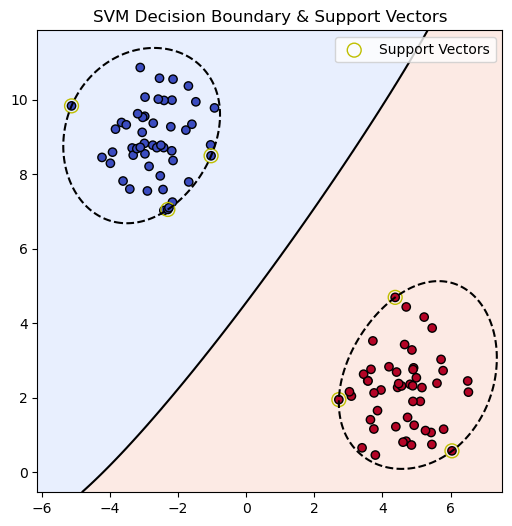

In [11]:
import numpy as np  # numpy: 숫자 계산을 쉽게 해주는 도구
import matplotlib.pyplot as plt  # matplotlib.pyplot: 그래프를 그려주는 도구
from sklearn import svm, datasets  # svm: SVM 모델, datasets: 데이터셋을 만들어주는 도구

X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=42)  # make_blobs: 두 그룹(centers=2)으로 나뉜 100개 데이터 만들기
clf = svm.SVC(kernel='rbf', C=1.0, gamma='scale').fit(X, y)  # SVM 모델 만들고(X, y로 공부)
# kernel='rbf': 곡선 경계 사용, C=1.0: 오차 허용 정도, gamma='scale': 곡선 모양 자동

# Meshgrid 생성(xx, yy): 그래프에 경계선을 그리기 위해 x, y 좌표를 촘촘하게 만듦
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # 각 점이 경계에서 얼마나 떨어졌는지 계산

# 시각화(그래프로 보기 좋게 그림)
plt.figure(figsize=(6,6))  # 그림 크기 정하기 (가로 6, 세로 6)
plt.contourf(xx, yy, Z > 0, alpha=0.2, cmap='coolwarm')  # 배경색: 두 그룹을 색으로 구분
plt.contour(xx, yy, Z, levels=[-1,0,1], linestyles=['--','-','--'], colors='k')  # 경계선(실선, 점선) 그리기
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', edgecolors='k')  # 데이터 점 찍기(색으로 그룹 구분)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1],
            facecolors='none', edgecolors='y', s=100, label="Support Vectors")  # SVM이 중요하게 생각하는 점(서포트 벡터) 노란색 동그라미
plt.title("SVM Decision Boundary & Support Vectors")  # 그래프 제목
plt.legend()  # 범례(설명) 표시
plt.show()  # 그래프 화면에 보여주기

| 비교 항목  | Random Forest | SVM                |
| ------ | ------------- | ------------------ |
| 학습 속도  | 빠름            | 느림 (대규모일수록)        |
| 성능     | 일반적으로 강건함     | 고차원일수록 우수          |
| 해석 가능성 | 피처 중요도 해석 가능  | 해석 어려움             |
| 과적합 위험 | 적음            | 적절한 C, gamma 설정 필요 |
